In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_mean_pool
from torch_geometric.data import Data, DataLoader
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
import heapq
import random
from collections import deque, defaultdict
import pickle
import os
import json
import time
from datetime import datetime
from tqdm import tqdm
import warnings
import logging
from typing import Dict, List, Tuple, Optional, Union
import multiprocessing as mp
from concurrent.futures import ProcessPoolExecutor, ThreadPoolExecutor
import threading
from dataclasses import dataclass
warnings.filterwarnings('ignore')

In [5]:
print("Hello World")

Hello World


In [6]:
import torch
from torch_geometric.datasets import KarateClub
from torch_geometric.utils import to_networkx
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from torch.nn import Linear
from torch_geometric.nn import GCNConv

In [7]:
dataset = KarateClub()
data = dataset[0]
node_ft = pd.DataFrame(data = data.x.numpy(), columns = [f'feature_{i}' for i in range(len(data.x))])
node_ft

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
data.edge_index.numpy().T

array([[ 0,  1],
       [ 0,  2],
       [ 0,  3],
       [ 0,  4],
       [ 0,  5],
       [ 0,  6],
       [ 0,  7],
       [ 0,  8],
       [ 0, 10],
       [ 0, 11],
       [ 0, 12],
       [ 0, 13],
       [ 0, 17],
       [ 0, 19],
       [ 0, 21],
       [ 0, 31],
       [ 1,  0],
       [ 1,  2],
       [ 1,  3],
       [ 1,  7],
       [ 1, 13],
       [ 1, 17],
       [ 1, 19],
       [ 1, 21],
       [ 1, 30],
       [ 2,  0],
       [ 2,  1],
       [ 2,  3],
       [ 2,  7],
       [ 2,  8],
       [ 2,  9],
       [ 2, 13],
       [ 2, 27],
       [ 2, 28],
       [ 2, 32],
       [ 3,  0],
       [ 3,  1],
       [ 3,  2],
       [ 3,  7],
       [ 3, 12],
       [ 3, 13],
       [ 4,  0],
       [ 4,  6],
       [ 4, 10],
       [ 5,  0],
       [ 5,  6],
       [ 5, 10],
       [ 5, 16],
       [ 6,  0],
       [ 6,  4],
       [ 6,  5],
       [ 6, 16],
       [ 7,  0],
       [ 7,  1],
       [ 7,  2],
       [ 7,  3],
       [ 8,  0],
       [ 8,  2],
       [ 8, 30

In [9]:
edge_in = pd.DataFrame(data= data.edge_index.numpy().T, columns=['Source','Destination'])
labels = pd.DataFrame(data= data.y.numpy(), columns= ['label'])
labels['node'] = labels.index
labels.set_index('node', inplace = True)

In [10]:
edge_in

,Source,Destination
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
151,33,28
152,33,29
153,33,30
154,33,31


In [11]:
labels

,label
node,
0,1
1,1
2,1
3,1
4,3
5,3
6,3
7,1
8,0


In [12]:
data.num_nodes

34

In [13]:
num_countries = 4 #sadly abhi ke liye dataset esa hi tha

np.random.seed(42)
countries = torch.tensor(np.random.choice(num_countries, data.num_nodes))

In [14]:
countries

tensor([2, 3, 0, 2, 2, 3, 0, 0, 2, 1, 2, 2, 2, 2, 3, 0, 3, 3, 3, 2, 1, 0, 1, 3,
        3, 1, 1, 1, 3, 3, 0, 0, 3, 1], dtype=torch.int32)

In [15]:
data.y = countries

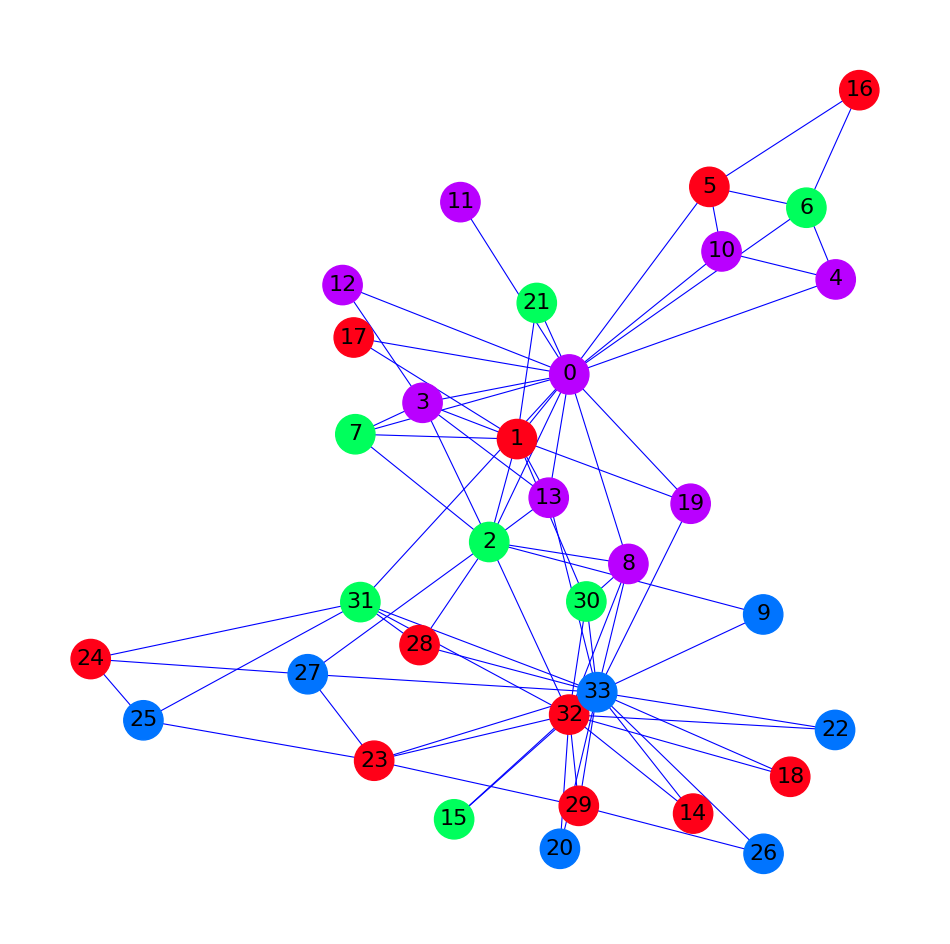

In [16]:
graph = to_networkx(data=data,to_undirected=True)
plt.figure(figsize=(12,12))
plt.axis('off')
nx.draw_networkx(
    graph,
    pos= nx.spring_layout(G=graph, seed = 0),
    with_labels= True,
    node_size = 800,
    node_color = data.y,
    cmap = 'hsv',
    vmin = -2,
    vmax = 3,
    width = 0.8,
    edge_color = 'blue',
    font_size = 16
)
plt.show()

In [36]:
#will define our core GNN model here
class sampleGNN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.gcnModel = GCNConv(in_channels = data.num_features, out_channels = 2148,)
        # self.gcnModel2 = GCNConv(in_channels = 10, out_channels = 8)
        self.out = Linear(in_features = 2148, out_features = num_countries)
    def forward(self, x, edge_index):
        h = self.gcnModel(x, edge_index).relu()
        z = self.out(h)
        return h , z

sample_model = sampleGNN()
print(sample_model)

sampleGNN(
  (gcnModel): GCNConv(34, 2148)
  (out): Linear(in_features=2148, out_features=4, bias=True)
)


In [37]:
print(sample_model.cpu)

<bound method Module.cpu of sampleGNN(
  (gcnModel): GCNConv(34, 2148)
  (out): Linear(in_features=2148, out_features=4, bias=True)
)>


In [38]:
criterion = torch.nn.CrossEntropyLoss()
optimzier = torch.optim.Adam(sample_model.parameters(), lr = 0.005)

#now will calculate the accuracy of the model using the cross entropy loss function
def accuracy(pred_y, y):
    return (pred_y == y).sum() / len(y)

In [39]:
#now animation time
embeddings = []
losses = []
accuracies = []
output = []
import time as t
start_time = t.time()
for epoch in range(200):
    optimzier.zero_grad() # the gradient of the optimizer is converted to 0 , if you are on the 2nd epoch , and the grad for first can out to be about 1.2 units
    h, z = sample_model(data.x, data.edge_index)
    long_data_manipulated = data.y.type(torch.LongTensor)
    loss = criterion(z, long_data_manipulated)
    acc = accuracy(z.argmax(dim=1), data.y)
    loss.backward()
    optimzier.step()
    embeddings.append(h)
    losses.append(loss)
    accuracies.append(acc)
    output.append(z.argmax(dim = 1))
    if epoch % 10 == 0:
        print(f'Epoch {epoch :> 3} | Loss : {loss : .2f} | Acc. {acc*100 : .2f}%')
        end_time = t.time()
        print(f'This Iteration took about {end_time-start_time}')
        start_time = end_time


Epoch   0 | Loss :  1.39 | Acc.  26.47%
This Iteration took about 0.010174989700317383
Epoch  10 | Loss :  0.61 | Acc.  85.29%
This Iteration took about 0.06685709953308105
Epoch  20 | Loss :  0.11 | Acc.  100.00%
This Iteration took about 0.0677793025970459
Epoch  30 | Loss :  0.02 | Acc.  100.00%
This Iteration took about 0.05439281463623047
Epoch  40 | Loss :  0.00 | Acc.  100.00%
This Iteration took about 0.06647753715515137
Epoch  50 | Loss :  0.00 | Acc.  100.00%
This Iteration took about 0.06107902526855469
Epoch  60 | Loss :  0.00 | Acc.  100.00%
This Iteration took about 0.05386686325073242
Epoch  70 | Loss :  0.00 | Acc.  100.00%
This Iteration took about 0.05468177795410156
Epoch  80 | Loss :  0.00 | Acc.  100.00%
This Iteration took about 0.05563163757324219
Epoch  90 | Loss :  0.00 | Acc.  100.00%
This Iteration took about 0.05886673927307129
Epoch  100 | Loss :  0.00 | Acc.  100.00%
This Iteration took about 0.056485891342163086
Epoch  110 | Loss :  0.00 | Acc.  100.00%
T

In [23]:
!winget install ffmpeg


   - 
                                                                                                                        

   - 
   \ 
                                                                                                                        
Found FFmpeg [Gyan.FFmpeg] Version 7.1.1
This application is licensed to you by its owner.
Microsoft is not responsible for, nor does it grant any licenses to, third-party packages.
Successfully verified installer hash
Extracting archive...
Successfully extracted archive
Starting package install...
Command line alias added: "ffmpeg"
Command line alias added: "ffplay"
Command line alias added: "ffprobe"


In [26]:
!where ffmpeg


INFO: Could not find files for the given pattern(s).


In [24]:
!ffmpeg --version

'ffmpeg' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
import matplotlib
matplotlib.use("Agg")  # optional for headless environments

import matplotlib.animation as animation
animation.writers['ffmpeg'] = animation.FFMpegWriter()

TypeError: 'MovieWriterRegistry' object does not support item assignment

RuntimeError: Requested MovieWriter (ffmpeg) not available

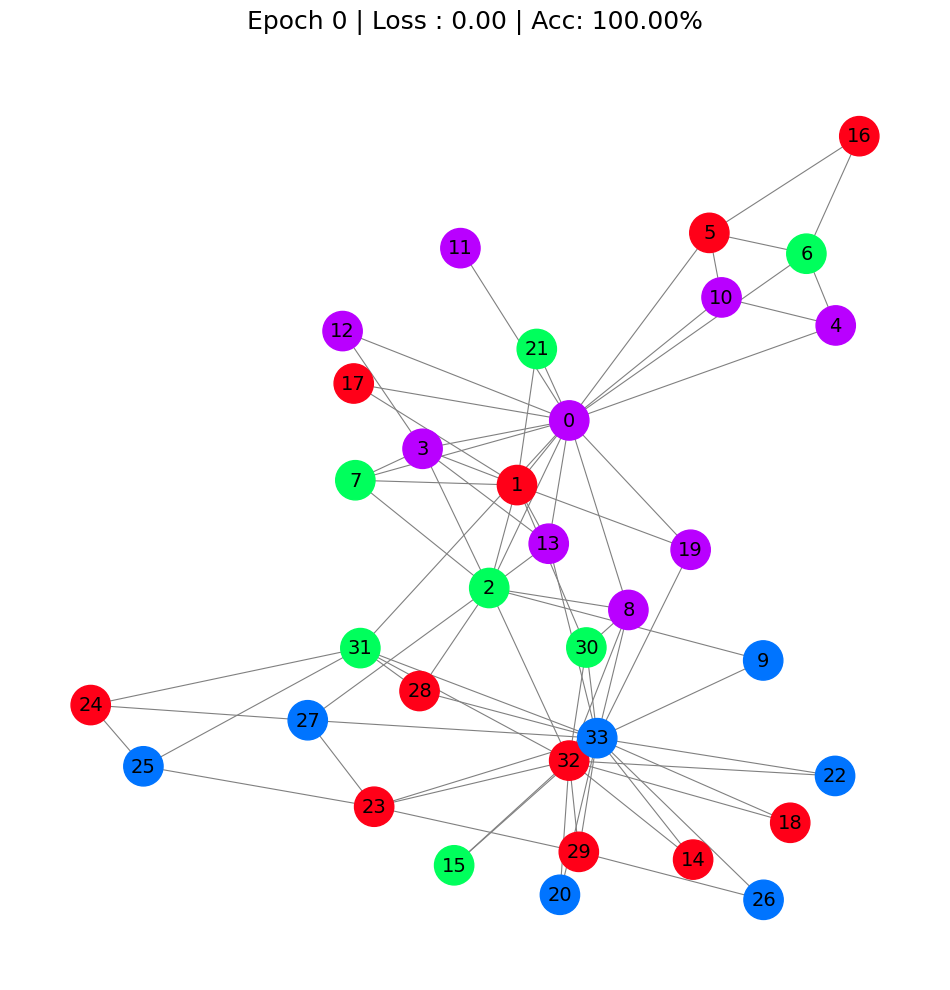

In [ ]:
from IPython.display import HTML
from matplotlib import animation

plt.rcParams["animation.bitrate"] = 4000

def animate(i):
    G = to_networkx(data=data, to_undirected=True)
    nx.draw_networkx(
        G,
        pos=nx.spring_layout(G,seed = 0),
        with_labels= True,
        node_size = 800,
        node_color = output[i].numpy(),
        cmap = 'hsv',
        vmin = -2,
        vmax = 3,
        width = 0.8,
        edge_color = "grey",
        font_size = 14
    )
    plt.title(f'Epoch {i} | Loss : {losses[i].item():.2f} | Acc: {accuracies[i].item()*100:.2f}%',fontsize = 18, pad = 20)

fig = plt.figure(figsize = (12,12))
plt.axis('off')
anim = animation.FuncAnimation(fig,animate, np.arange(0,200,10), interval=500, repeat=True)
html = HTML(anim.to_html5_video())
display(html)